<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных-для-машинного-обучения" data-toc-modified-id="Подготовка-данных-для-машинного-обучения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных для машинного обучения</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Обучение-моделей-без-учета-дисбаланса" data-toc-modified-id="Обучение-моделей-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

У «Бета-Банка» наблюдается ежемесячный отток клиентов. 

**Цель**

- Сохранить текущих клиентов дешевле, чем привлекать новых

**Задачи**

- Исследовать исторические данные о поведении клиентов и расторжении договоров с банком

- Построить модель с предельно большим значением F1-меры (значение метрики от 0.59)

- Проверить F1-меру на тестовой выборке

- Дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой




**Описание данных**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**

- Exited — факт ухода клиента

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

###  Обзор данных

In [1]:
#импортируем нужные библиотеки
import numpy as np
import pandas as pd


#для визуализации
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
sns.set(style="whitegrid", palette="Pastel1")


#для конвейера
!pip install imblearn

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline


#для проверки корреляции признаков
!pip install phik
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from phik import resources, report


#для алгоритмов
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score, 
    KFold
)    
from sklearn.metrics import (
    confusion_matrix, 
    roc_auc_score, 
    f1_score, 
    precision_score, 
    recall_score
)
from sklearn.utils import shuffle
from sklearn.feature_selection import (f_classif, RFE)
from sklearn import metrics

#для пайплайна
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)


#игнорировать предупреждения
import warnings
warnings.filterwarnings('ignore')


#константа
random_state = 222

     |████████████████████████████████| 226 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 53.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 33.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 679 kB 2.5 MB/s eta 0:00:01


In [2]:
#функция для быстрого просмотра датасета
def information(df: 'DataFrame', name: 'str') -> None:
    print('*'*30,name,'*'*30)
    print()
    display(df.head(3))
    print('-'*25,'INFO','-'*25)
    print()
    display(df.info())
    print()
    print('-'*10,'NAN','-'*10)
    print()
    display(df.isna().sum())
    print()
    print('-'*5,'DESCRIBE','-'*5)
    display(df.describe())
    print()
    print('-'*5,'DUPLICATED','-'*5)
    display(df.duplicated().sum())
    print()
    print('-'*25,'UNIQUE VALUES','-'*25)
    for column in df.columns:
        display(column)
        display(df[column].unique())
        print('+'*25)

In [3]:
#откроем файл с данными
df = pd.read_csv('/datasets/Churn.csv')
#посмотрим на датасет
information(df, 'df')

****************************** df ******************************



RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None


---------- NAN ----------



RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


----- DESCRIBE -----


RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000


----- DUPLICATED -----


0


------------------------- UNIQUE VALUES -------------------------


'RowNumber'

array([    1,     2,     3, ...,  9998,  9999, 10000])

+++++++++++++++++++++++++


'CustomerId'

array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319])

+++++++++++++++++++++++++


'Surname'

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

+++++++++++++++++++++++++


'CreditScore'

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

+++++++++++++++++++++++++


'Geography'

array(['France', 'Spain', 'Germany'], dtype=object)

+++++++++++++++++++++++++


'Gender'

array(['Female', 'Male'], dtype=object)

+++++++++++++++++++++++++


'Age'

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

+++++++++++++++++++++++++


'Tenure'

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

+++++++++++++++++++++++++


'Balance'

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

+++++++++++++++++++++++++


'NumOfProducts'

array([1, 3, 2, 4])

+++++++++++++++++++++++++


'HasCrCard'

array([1, 0])

+++++++++++++++++++++++++


'IsActiveMember'

array([1, 0])

+++++++++++++++++++++++++


'EstimatedSalary'

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

+++++++++++++++++++++++++


'Exited'

array([1, 0])

+++++++++++++++++++++++++


- Итак мы имеем датасет в **10 000** строк с **14** столбцами.
- Дубликатов нет.
- Есть пропуске в признаке **Tenure**.

### Предобработка данных

In [4]:
df['Exited'].value_counts(normalize=True) #посмотрим целевой признак и его распределение

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Целевой признак(**обучение с учителем**) у нас имеет категориальные данные (их две) значит предстоит задача **бинарной классификации**. Как мы видим имеем **дисбаланс классов** 1:4, значит выборки нужно будет делать со стратификацией.

# **Посмотрим на корреляцию признаков**

**Так как у нас задача бинарной классификации, при этом, у нас в признаках имеются и числовые и категориальные признаки, мы будем смотреть корреляцию по Фику**

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


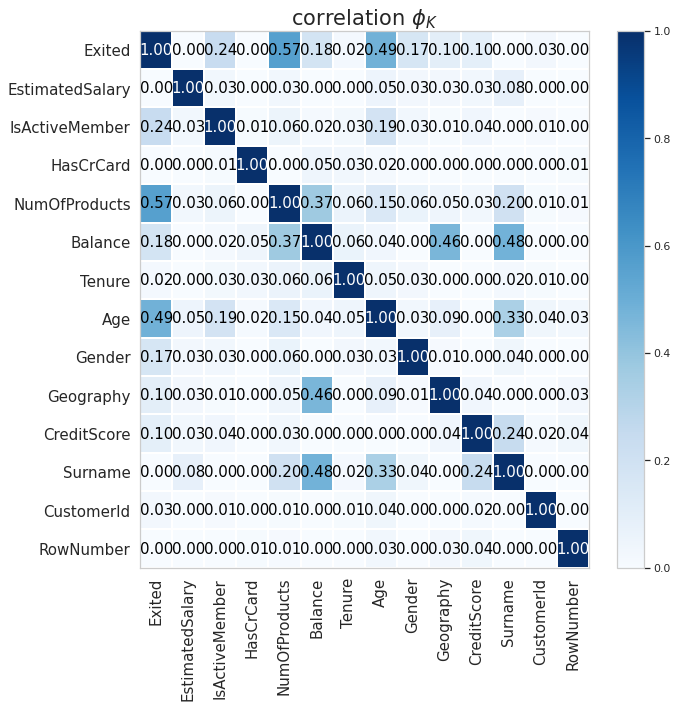

In [5]:
interval_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
phik = df.phik_matrix()
plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r'correlation $\phi_K$', 
                        fontsize_factor=1.5, 
                        figsize=(10, 10))
plt.tight_layout()

- Как мы видим существенную корреляцию с целевым имеют признаки : 

- **NumOfProducts, Age** так же можно наблюдать небольшую корреляцию между признаками **IsActiveMember и Balance**, далее идут **Gender, Geography, CreditScore**

# Посмотрим на глобальную корреляцию по Фику

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


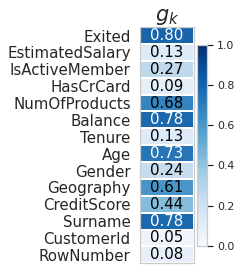

In [6]:
global_correlation, global_labels = df.global_phik()

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Blues", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

In [7]:
df['Surname'].duplicated().sum()

7068

In [8]:
df['CustomerId'].duplicated().sum()

0

Исходя из данных по корреляции признаков, можем наблюдать, что часть признаков не имеют никакого значения для нашей целевой задачи, так же они не имеют корреляции между друг другом... Соответственно их удалим из нашего датасета, чтобы не создавать шум.

**Нет корреляции:**

- 'EstimatedSalary'

- 'HasCrCard'

- 'Tenure'

- 'CustomerId'

- 'RowNumber'

- 'Surname' (по глобальной корреляции показывает силу **0.78** возможно есть однофамильцы, но это вполне логично, так как все данные связаны к одному id, а фамилия и id практически один и тот же признак. Так как дубликатов в id не обнаружено, считаю целесообразным удалить данный столбец тоже.

# Вывод:

**рассмотрев корреляцию признаков, решено убрать некоторые незначительные признаки, которые не имеют корреляции с целевым признаком, а так же друг с другом (в том числе и столбец с пропусками):**

- 1. 'RowNumber'
- 2. 'CustomerId'
- 3. 'HasCrCard'
- 4. 'Surname' 
- 5. 'EstimatedSalary' 
- 6. 'Tenure'

- Самая высокая корреляция у нас с признаком **'NumOfProducts'**


Его решено перевести в категориальный признак и обработать OHE методом, для улучшения качества линейной модели. 

- Далее **Age**, так же можно наблюдать небольшую корреляцию между признаками **IsActiveMember и Balance**, далее идут **Gender, Geography, CreditScore**

В признаке **'Tenure'** у нас имеются пропуски, но так как у него незначительная корреляция с целевым признаком, плюс по глобальной корреляции у него нет связи ни с одним из признаков, считаю целесообразным удалить его тоже.

In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'HasCrCard', 'Surname', 'EstimatedSalary', 'Tenure'], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [10]:
#выделим числовые и категориальные признаки
num = ['Balance', 'Age', 'CreditScore']
cat = ['Geography', 'Gender', 'IsActiveMember', 'NumOfProducts']

In [11]:
#посмотрим распределение непрерывных признаков (сохраним их в переменную)
df[num].describe()

Balance           Age   CreditScore
count   10000.000000  10000.000000  10000.000000
mean    76485.889288     38.921800    650.528800
std     62397.405202     10.487806     96.653299
min         0.000000     18.000000    350.000000
25%         0.000000     32.000000    584.000000
50%     97198.540000     37.000000    652.000000
75%    127644.240000     44.000000    718.000000
max    250898.090000     92.000000    850.000000

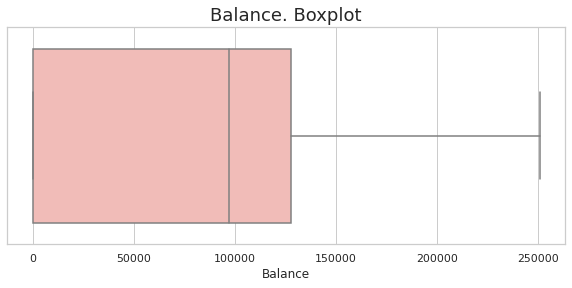

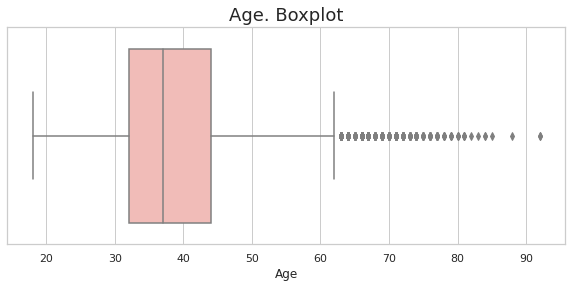

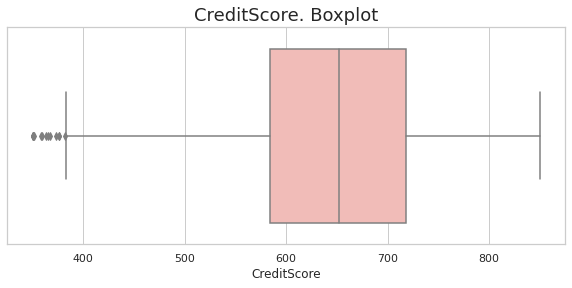

In [12]:
for column in num:
    f, axes = plt.subplots(figsize=(10, 4))
    axes.set_title(column + ". Boxplot", fontsize=18)
    sns.boxplot(df[column], x=column);

Наблюдаем выбросы в признаках **Age** и **CreditScore**, посчитаем их долю в процентном соотношении:

Для **Age** граница выбросов считается по формуле  [ q.75 + (q.75 - q.25)*1.5 ]

Для **CreditScore** граница выбросов считается по формуле [ q.25 - (q.75 - q.25)*1.5 ]

In [13]:
max = (df['Age'].quantile(0.75) - df['Age'].quantile(0.25))*1.5 + df['Age'].quantile(0.75)
rate = round(len(df.loc[df['Age'] > max]) / len(df) * 100, 2)
display('Доля выбросов в признаке {}: {} %'.format('Age', rate))



min = df['CreditScore'].quantile(0.25) - \
            (df['CreditScore'].quantile(0.75) - df['CreditScore'].quantile(0.25))*1.5
rate = round(len(df.loc[df['CreditScore'] < min]) / len(df) * 100, 2)
display('Доля выбросов в признаке {}: {} %'.format('CreditScore', rate))

'Доля выбросов в признаке Age: 3.59 %'

'Доля выбросов в признаке CreditScore: 0.15 %'

**Общая доля выбросов не значительна - 3.74% (менее 5%) поэтому не будем резать датасет, чтобы не терять данные**

# Теперь рассмотрим основные коррелирующие признаки и их связь с целевым

In [14]:
df_out = df.loc[df['Exited'] == 1]
df_out.describe()

CreditScore          Age        Balance  NumOfProducts  IsActiveMember  \
count  2037.000000  2037.000000    2037.000000    2037.000000     2037.000000   
mean    645.351497    44.837997   91108.539337       1.475209        0.360825   
std     100.321503     9.761562   58360.794816       0.801521        0.480358   
min     350.000000    18.000000       0.000000       1.000000        0.000000   
25%     578.000000    38.000000   38340.020000       1.000000        0.000000   
50%     646.000000    45.000000  109349.290000       1.000000        0.000000   
75%     716.000000    51.000000  131433.330000       2.000000        1.000000   
max     850.000000    84.000000  250898.090000       4.000000        1.000000   

       Exited  
count  2037.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0

Общее количество клиентов: 10000


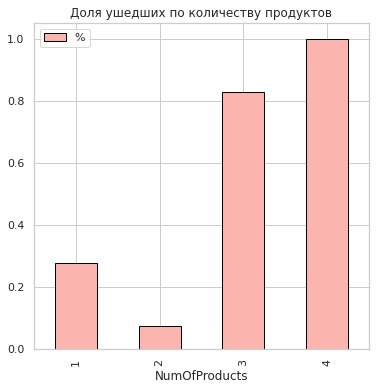

In [15]:
print('Общее количество клиентов:', len(df))
(df.pivot_table(values='Exited', index=['NumOfProducts'] , aggfunc=['mean'])).plot(kind='bar', ec='black', figsize=(6,6))
plt.title('Доля ушедших по количеству продуктов')
plt.legend('%');

**Как видим чаще всего уходят клиенты, у которых 3 и 4 продукта, видимо условия у банка очень некомфортные, для тех, кто готов доверить и хранить свои средства.**

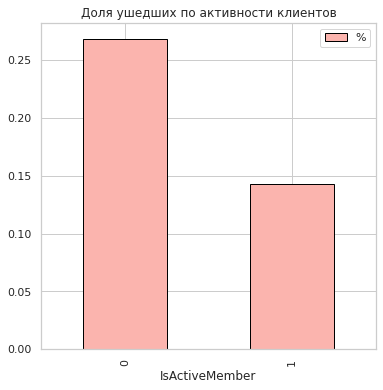

In [16]:
(df.pivot_table(values='Exited', index=['IsActiveMember'] , aggfunc=['mean'])).plot(kind='bar', ec='black', figsize=(6,6))
plt.title('Доля ушедших по активности клиентов')
plt.legend('%');

**Больше всего оттока у не активных клиентов, необходимо привлечь действующих неактивных клиентов, стимулируя чаще пользоваться их продуктом, возможно акции, кешбеки.**

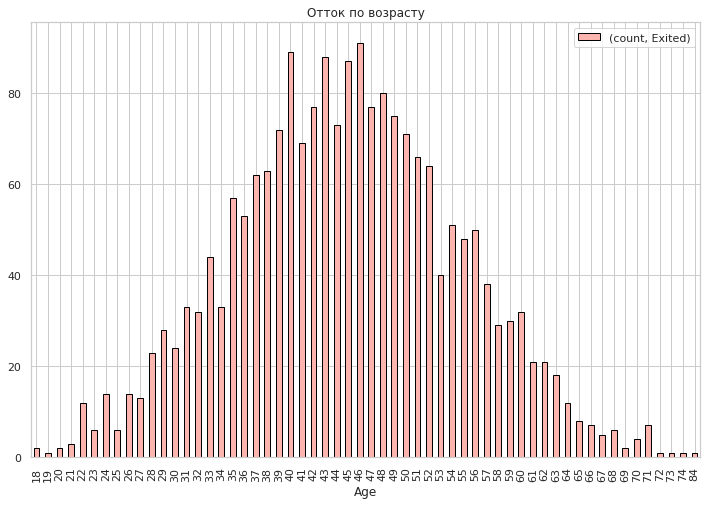

In [17]:
age = df_out.pivot_table(values='Exited', index=['Age'] ,aggfunc=['count'])
age.plot(kind='bar', ec='black', figsize=(12,8))
plt.xlim = [0,100]
plt.title('Отток по возрасту')
plt.legend();

**Средний возраст у оттока от 28 до 63 лет, пики 40, 43, 45 и 46 лет (что опять же может указывать на невыгодные ставки по вкладам и депозитарным продуктам банка) скорее всего в таком возрасте человек имеет довольно приличную сумму, для хранения и приумножения.**

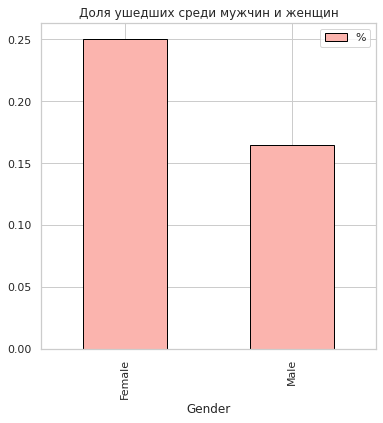

In [18]:
(df.pivot_table(values='Exited', index=['Gender'] ,aggfunc=['mean'])).plot(kind='bar', ec='black', figsize=(6,6))
plt.title('Доля ушедших среди мужчин и женщин')
plt.legend('%');

**Среди ушедших больше женщин, чем мужчин**

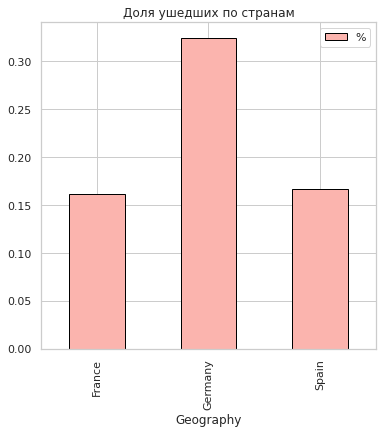

In [19]:
(df.pivot_table(values=['Exited'], index=['Geography'] ,aggfunc=['mean'])).plot(kind='bar', ec='black', figsize=(6,6))
plt.title('Доля ушедших по странам')
plt.legend('%');

**Больше всего оттока в Германии, нужно внимательно ознакомиться с условиями депозитарной линейки и бонусных предложений в данном регионе**

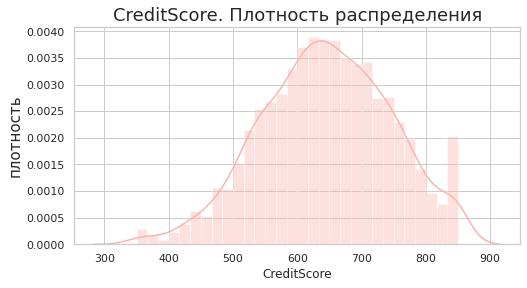

In [20]:
plt.subplots(figsize=(8, 4))
plt.title('CreditScore' + ". Плотность распределения", fontsize=18)
plt.ylabel('плотность', fontsize=15)
sns.distplot(df_out['CreditScore'], bins=30, rug=False);

**Среднее распределение по оттоку от значения 550 до 750, пики 620-650, можно сказать средний кредитный рейтинг**

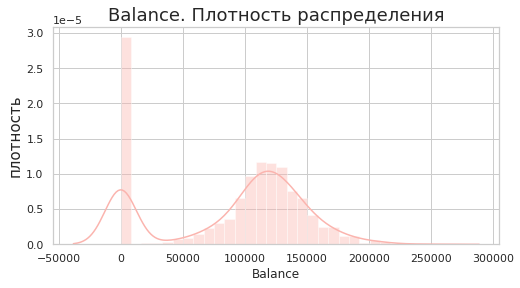

In [21]:
plt.subplots(figsize=(8, 4))
plt.title('Balance' + ". Плотность распределения", fontsize=18)
plt.ylabel('плотность', fontsize=15)
sns.distplot(df_out['Balance'], bins=30, rug=False);

**По балансу видим что в среднем уходят люди с приличным балансом от 100 000 до 150 000**

# Вывод:

- мы имеем датасет в 10 000 строк с 14 столбцами
- целевой признак(обучение с учителем) у нас имеет категориальные данные (их две) значит предстоит задача бинарной классификации. Как мы видим имеем дисбаланс классов - отрицательных объектов почти в 4 раза больше, чем положительных, значит выборки нужно будет делать со стратификацией, и далее работать с балансировкой классов
- имеются пропуски в столбце Tenure, но так как у него незначительная корреляция с целевым признаком, плюс по глобальной корреляции у него нет связи ни с одним из признаков, считаю целесообразным удалить его.
- **рассмотрев корреляцию признаков, решено убрать некоторые незначительные признаки, которые не имеют корреляции с целевым признаком, а так же друг с другом (в том числе и столбец с пропусками):**


- 1. 'RowNumber'
- 2. 'CustomerId'
- 3. 'HasCrCard'
- 4. 'Surname' 
- 5. 'EstimatedSalary' 
- 6. 'Tenure'


- столбец Geography, Gender и NumOfProducts необходимо преобразовать OHE методом
- дубликатов не обнаружено
- значения в непрерывных признаках  имеют небольшие выбросы

# По поводу влияния признаков:

- Как видим чаще всего уходят клиенты, у которых 3 и 4 продукта, видимо условия у банка очень некомфортные, для тех, кто готов доверить и хранить свои средства.

- Больше всего оттока у не активных клиентов, необходимо привлечь действующих неактивных клиентов, стимулируя чаще пользоваться их продуктом, возможно акции, кешбеки.

- Средний возраст у оттока от 28 до 63 лет, пики 40, 43, 45 и 46 лет (что опять же может указывать на невыгодные ставки по вкладам и депозитарным продуктам банка) скорее всего в таком возрасте человек имеет довольно приличную сумму, для хранения и приумножения.

- Среди ушедших больше женщин, чем мужчин.

- Больше всего оттока в Германии, нужно внимательно ознакомиться с условиями депозитарной линейки и бонусных предложений в данном регионе.

- Среднее распределение по оттоку от значения 550 до 750, пики 620-650, можно сказать средний кредитный рейтинг

- По балансу видим что в среднем уходят люди с приличным балансом от 100 000 до 150 000

### Подготовка данных для машинного обучения

In [22]:
df['NumOfProducts'] = df['NumOfProducts'].astype('object') #переведем в формат object для OHE

In [23]:
#изменим тип для экономии памяти
to_int = ['CreditScore', 'Age', 'Exited', 'IsActiveMember']
df[to_int] = df[to_int].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int8   
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int8   
 4   Balance         10000 non-null  float64
 5   NumOfProducts   10000 non-null  object 
 6   IsActiveMember  10000 non-null  int8   
 7   Exited          10000 non-null  int8   
dtypes: float64(1), int8(4), object(3)
memory usage: 351.7+ KB


In [24]:
#приведем названия столбцов к змеиному стилю + к нижнему регистру
for i, j in enumerate(df.columns):
    j = ''.join(['_' + c.lower() if c.isupper() else c for c in j]).lstrip('_')
    df = df.rename(columns={df.columns[i]: j})

df.columns = df.columns.str.lower()
df.columns

Index(['credit_score', 'geography', 'gender', 'age', 'balance',
       'num_of_products', 'is_active_member', 'exited'],
      dtype='object')

In [25]:
y = df['exited']
X = df.drop('exited', axis=1)

#Разобьем данные сначала на обучающую выборку 75% тестовую 25%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state, stratify=y)


In [26]:
#проверим соотношение в признаке(должно быть одинаковыми пропорциями), а так же размерность выборок
print("Обучающая выборка:", X_train.shape)
print(y_train.value_counts(normalize=True))
print("-"*30)
print("Тестовая выборка:", X_test.shape)
print(y_test.value_counts(normalize=True))
print("-"*30)

Обучающая выборка: (7500, 7)
0    0.796267
1    0.203733
Name: exited, dtype: float64
------------------------------
Тестовая выборка: (2500, 7)
0    0.7964
1    0.2036
Name: exited, dtype: float64
------------------------------


**Выделяем признаки для OHE и стандартизации**

In [27]:
ohe_features = X_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['geography', 'gender', 'num_of_products']


In [28]:
num_features = X_train.select_dtypes(exclude='object').columns.to_list()
num_features.remove('is_active_member')
num_features

['credit_score', 'age', 'balance']

In [29]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(X_train[ohe_features])

X_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_train[ohe_features])


X_train = X_train.drop(ohe_features, axis=1)

scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])

# Вывод:

- извлекли признаки
- разбили данные на 2 выборки: обучающую, тестовую со стратификацией классов
- преобразовали OHE методом категориальные признаки
- выполнили масштабирование численных признаков

**Теперь наши данные готовы к машинному обучению**

## Исследование задачи

### Баланс классов

In [30]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.796267
1    0.203733
Name: exited, dtype: float64
0    0.7964
1    0.2036
Name: exited, dtype: float64


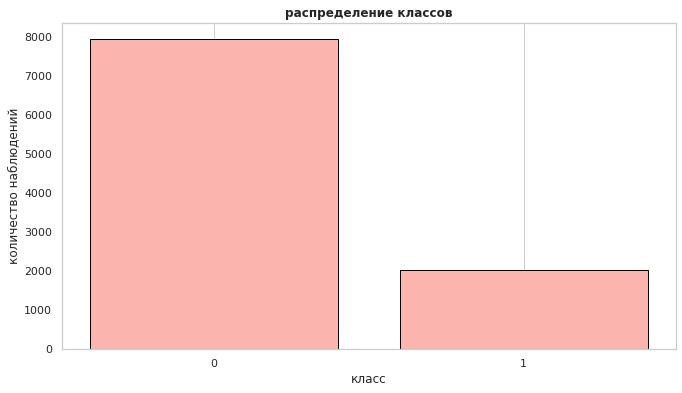

In [31]:
plt.figure(figsize=(11, 6))
unique, counts = np.unique(df['exited'], return_counts=True)
plt.bar(unique, counts, ec='black')
plt.xticks(unique)
plt.xlabel('класс')
plt.ylabel('количество наблюдений')
plt.title('распределение классов', fontweight='bold')
plt.grid(axis='y', linewidth=0.5);

# Вывод
Как и говорилось выше мы наблюдаем дисбаланс классов:

**Превышение отрицательного класса почти в 4 раза**

- объекты отрицательного класса примерно **80%**
- объекты положительного класса примерно **20%**



### Обучение моделей без учета дисбаланса

# RandomForestClassifier

**Выделим гиперпараметры для настройки модели:**
- n_estimators - количество деревьев
- max_depth - максимальная глубина древа
- min_samples_split - минимальное количество объектов в узле
- min_samples_leaf - минимальное количество объектов в листе
- Критерием проверки качества модели будет f1


In [32]:
model_rf = RandomForestClassifier(random_state=random_state)



param_grid_rf = {
    'n_estimators': range(30, 100),
    'max_depth': range(10,100,2),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}


gs_rf = RandomizedSearchCV(
    model_rf, 
    param_distributions=param_grid_rf, 
    scoring='f1', 
    n_jobs=-1,
    error_score='raise',
    random_state=random_state
)

gs_rf.fit(X_train, y_train)

gs_rf_best_score = gs_rf.best_score_ 
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')
 

 

best_score: 0.5941937215604606
best_params: {'n_estimators': 76, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 84}


# GradientBoostingClassifier

**Выделим гиперпараметры для настройки модели:**
- learning_rate - коэффициент скорости обучения
- n_estimators - количество деревьев
- max_depth - максимальная глубина древа
- Критерием проверки качества модели будет f1

In [33]:
model_gb = GradientBoostingClassifier(random_state=random_state)


param_grid_gb = {
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 150],
    'max_depth':[3,5],
}

gs_gb = RandomizedSearchCV(
    model_gb, 
    param_distributions=param_grid_gb, 
    scoring='f1', 
    n_jobs=-1,
    error_score='raise',
    random_state=random_state)


gs_gb.fit(X_train, y_train)

gs_gb_best_score = gs_gb.best_score_ 
gs_gb_best_params = gs_gb.best_params_
print(f'best_score: {gs_gb_best_score}')
print(f'best_params: {gs_gb_best_params}')

best_score: 0.5923518381368231
best_params: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


# CatBoostClassifier

**Выделим гиперпараметры для настройки модели:**
- depth - максимальная глубина древа
- l2_leaf_reg - L2 регуляризация
- Критерием проверки качества модели будет f1 

In [34]:
model_ct = CatBoostClassifier(loss_function='CrossEntropy', random_state=random_state)

param_grid_ct = {
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

gs_ct = RandomizedSearchCV(
    model_ct, 
    param_distributions=param_grid_ct, 
    scoring='f1', 
    n_jobs=-1,
    error_score='raise',
    random_state=random_state
)

gs_ct.fit(X_train, y_train)

gs_ct_best_score = gs_ct.best_score_ 
gs_ct_best_params = gs_ct.best_params_
print(f'best_score: {gs_ct_best_score}')
print(f'best_params: {gs_ct_best_params}')

0:	learn: 0.6745024	total: 63.1ms	remaining: 1m 3s
1:	learn: 0.6534800	total: 64.6ms	remaining: 32.2s
2:	learn: 0.6339326	total: 65.8ms	remaining: 21.9s
3:	learn: 0.6175781	total: 66.9ms	remaining: 16.7s
4:	learn: 0.6005375	total: 68.5ms	remaining: 13.6s
5:	learn: 0.5855327	total: 70.1ms	remaining: 11.6s
6:	learn: 0.5719021	total: 71.8ms	remaining: 10.2s
7:	learn: 0.5595140	total: 73.4ms	remaining: 9.1s
8:	learn: 0.5479109	total: 75.1ms	remaining: 8.26s
9:	learn: 0.5359440	total: 76.7ms	remaining: 7.6s
10:	learn: 0.5258099	total: 78ms	remaining: 7.01s
11:	learn: 0.5158099	total: 79.1ms	remaining: 6.52s
12:	learn: 0.5069446	total: 80.4ms	remaining: 6.1s
13:	learn: 0.4984860	total: 81.5ms	remaining: 5.74s
14:	learn: 0.4909458	total: 82.7ms	remaining: 5.43s
15:	learn: 0.4847380	total: 84.1ms	remaining: 5.17s
16:	learn: 0.4780665	total: 85.4ms	remaining: 4.94s
17:	learn: 0.4708621	total: 86.7ms	remaining: 4.73s
18:	learn: 0.4640869	total: 87.9ms	remaining: 4.54s
19:	learn: 0.4591550	total:

In [35]:
result = pd.DataFrame(
    [gs_rf_best_score, gs_gb_best_score, gs_ct_best_score],
    index=['RandomForestClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier'], 
    columns=['f1_score']
)
result

f1_score
RandomForestClassifier      0.594194
GradientBoostingClassifier  0.592352
CatBoostClassifier          0.601267

# На кросс валидации с подбором гиперпараметров, мы достигли удовлетворительной метрики f1. Выделились 2 модели: 

- **RandomForestClassifier** - **0.59**
- **CatBoostClassifier** - **0.60**

## Борьба с дисбалансом

# RandomForestClassifier c ручной балансировкой:

In [36]:
model_rf = RandomForestClassifier(random_state=random_state)



param_grid_rf = {
    'n_estimators': range(30, 100),
    'max_depth': range(10,100,2),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'class_weight': ['balanced']
}


gs_rf = RandomizedSearchCV(
    model_rf, 
    param_distributions=param_grid_rf, 
    scoring='f1', 
    n_jobs=-1,
    error_score='raise',
    random_state=random_state
)

gs_rf.fit(X_train, y_train)

gs_rf_best_score_cw = gs_rf.best_score_ 
gs_rf_best_params = gs_rf.best_params_
print(f'best_score: {gs_rf_best_score_cw}')
print(f'best_params: {gs_rf_best_params}')
 

best_score: 0.6266491243824038
best_params: {'n_estimators': 95, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 14, 'class_weight': 'balanced'}


# Оверсемплинг SMOTE С использованием конвейера `imblearn`:

In [37]:
kf = KFold(n_splits=5)

# CatBoostClassifier SMOTE

In [38]:
imba_pipeline_ct = make_pipeline(SMOTE(random_state=random_state), 
                                 CatBoostClassifier(random_state=random_state))
cross_val_score(imba_pipeline_ct, X_train, y_train, scoring='f1', cv=kf)

Learning rate set to 0.026963
0:	learn: 0.6765763	total: 5.8ms	remaining: 5.8s
1:	learn: 0.6622392	total: 10.8ms	remaining: 5.38s
2:	learn: 0.6481216	total: 15.9ms	remaining: 5.29s
3:	learn: 0.6367947	total: 20.8ms	remaining: 5.17s
4:	learn: 0.6243273	total: 25.5ms	remaining: 5.08s
5:	learn: 0.6144967	total: 30ms	remaining: 4.97s
6:	learn: 0.6044471	total: 34.5ms	remaining: 4.9s
7:	learn: 0.5957096	total: 41.7ms	remaining: 5.17s
8:	learn: 0.5862266	total: 48.6ms	remaining: 5.35s
9:	learn: 0.5772063	total: 52.3ms	remaining: 5.18s
10:	learn: 0.5693922	total: 57.1ms	remaining: 5.14s
11:	learn: 0.5617116	total: 62.8ms	remaining: 5.17s
12:	learn: 0.5547872	total: 68.6ms	remaining: 5.21s
13:	learn: 0.5479168	total: 74.6ms	remaining: 5.25s
14:	learn: 0.5419137	total: 80ms	remaining: 5.25s
15:	learn: 0.5364854	total: 84.6ms	remaining: 5.21s
16:	learn: 0.5320568	total: 88.2ms	remaining: 5.1s
17:	learn: 0.5264002	total: 91.9ms	remaining: 5.01s
18:	learn: 0.5219581	total: 95.5ms	remaining: 4.93s


array([0.58886894, 0.62264151, 0.64737794, 0.62897527, 0.62809917])

In [39]:
param_grid_ct = {
    'catboostclassifier__depth': [4, 6, 10],
    'catboostclassifier__l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_imba = RandomizedSearchCV(imba_pipeline_ct, param_distributions=param_grid_ct, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba.fit(X_train, y_train)


0:	learn: 0.6749935	total: 3.79ms	remaining: 3.78s
1:	learn: 0.6595580	total: 9.16ms	remaining: 4.57s
2:	learn: 0.6444554	total: 14.6ms	remaining: 4.85s
3:	learn: 0.6321836	total: 21.3ms	remaining: 5.3s
4:	learn: 0.6189456	total: 27.7ms	remaining: 5.51s
5:	learn: 0.6085890	total: 33.4ms	remaining: 5.54s
6:	learn: 0.5980231	total: 37.7ms	remaining: 5.35s
7:	learn: 0.5887668	total: 43ms	remaining: 5.33s
8:	learn: 0.5789846	total: 47.5ms	remaining: 5.22s
9:	learn: 0.5696391	total: 51.8ms	remaining: 5.13s
10:	learn: 0.5616165	total: 55.7ms	remaining: 5.01s
11:	learn: 0.5537209	total: 60.1ms	remaining: 4.95s
12:	learn: 0.5467328	total: 65.3ms	remaining: 4.96s
13:	learn: 0.5410866	total: 69.7ms	remaining: 4.91s
14:	learn: 0.5350195	total: 73.7ms	remaining: 4.84s
15:	learn: 0.5295082	total: 78.5ms	remaining: 4.83s
16:	learn: 0.5249846	total: 82.8ms	remaining: 4.79s
17:	learn: 0.5202955	total: 87.1ms	remaining: 4.75s
18:	learn: 0.5149308	total: 91.7ms	remaining: 4.74s
19:	learn: 0.5103694	tota

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=222)),
                                             ('catboostclassifier',
                                              <catboost.core.CatBoostClassifier object at 0x7f55f21a43d0>)]),
                   param_distributions={'catboostclassifier__depth': [4, 6, 10],
                                        'catboostclassifier__l2_leaf_reg': [1,
                                                                            3,
                                                                            5,
                                                                            7,
                                                                            9]},
                   return_train_score=True, scoring='f1')

In [40]:
grid_imba.best_params_

{'catboostclassifier__l2_leaf_reg': 5, 'catboostclassifier__depth': 4}

In [41]:
grid_imba.best_score_

0.6324901188669515

# RandomForestClassifier SMOTE

In [42]:
imba_pipeline_rf = make_pipeline(SMOTE(random_state=random_state), 
                                 RandomForestClassifier(random_state=random_state))
cross_val_score(imba_pipeline_rf, X_train, y_train, scoring='f1', cv=kf)

array([0.59415584, 0.6       , 0.58783784, 0.59412781, 0.6102719 ])

In [43]:
param_grid_rf = {
    'randomforestclassifier__n_estimators': range(30, 100),
    'randomforestclassifier__max_depth': range(10,100,2),
    'randomforestclassifier__min_samples_split': (2, 10),
    'randomforestclassifier__min_samples_leaf': (1, 4)
}
grid_imba_rf = RandomizedSearchCV(imba_pipeline_rf, param_distributions=param_grid_rf, cv=kf, scoring='f1',
                        return_train_score=True)
grid_imba_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=222)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=222))]),
                   param_distributions={'randomforestclassifier__max_depth': range(10, 100, 2),
                                        'randomforestclassifier__min_samples_leaf': (1,
                                                                                     4),
                                        'randomforestclassifier__min_samples_split': (2,
                                                                                      10),
                                        'randomforestclassifier__n_estimators': range(30, 100)},
                   return_train_score=True, scoring='f1')

In [44]:
grid_imba_rf.best_params_

{'randomforestclassifier__n_estimators': 94,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_depth': 22}

In [45]:
grid_imba_rf.best_score_

0.6139719560600668

In [46]:
result2 = pd.DataFrame(
    [gs_rf_best_score_cw, grid_imba.best_score_, grid_imba_rf.best_score_],
    index=['RandomForestClassifier_cw_balanced', 'CatBoostClassifier_SMOTE', 'RandomForestClassifier_SMOTE'], 
    columns=['f1_score']
)
result2

f1_score
RandomForestClassifier_cw_balanced  0.626649
CatBoostClassifier_SMOTE            0.632490
RandomForestClassifier_SMOTE        0.613972

# После борьбы с дисбалансом, отобраны 2 модели:

- **RandomForestClassifier_cw_balanced - 0.62**
- **CatBoostClassifier_SMOTE - 0.63**

## Тестирование модели

In [47]:
#энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
X_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_test[ohe_features])

X_test = X_test.drop(ohe_features, axis=1)


X_test[num_features] = scaler.transform(
    X_test[num_features]
)


# CatBoostClassifier SMOTE Test

In [48]:
y_test_predict = grid_imba.best_estimator_.predict(X_test)
f1_score(y_test, y_test_predict)

0.6206185567010308

In [49]:
y_pred_proba_ct = grid_imba.best_estimator_.predict_proba(X_test)[::, 1 ]
roc_auc_score(y_test, y_pred_proba_ct)

0.8759377907854502

# RandomForestClassifier SMOTE Test

In [50]:
y_test_predict_rf = grid_imba_rf.best_estimator_.predict(X_test)
f1_score(y_test, y_test_predict_rf)

0.6136783733826248

# RandomForestClassifier c ручной балансировкой и лучшими гиперпараметрами Test

In [51]:
model_rf = RandomForestClassifier(n_estimators=71, min_samples_split=10, 
                                  min_samples_leaf= 1, max_depth=56, 
                                  class_weight='balanced', random_state=random_state)

model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba (X_test)[::, 1 ]
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('f1:', f1)
print('площадь под кривой:', roc_auc)

f1: 0.6354581673306774
площадь под кривой: 0.8639427522081193


In [52]:
result3 = pd.DataFrame(
    [f1_score(y_test, y_test_predict), f1_score(y_test, y_test_predict_rf), f1],
    index=['CatBoostClassifierSMOTE_test', 'RandomForestClassifierSMOTE_test', 'RandomForestClassifier_cw_test'], 
    columns=['f1_score']
)
display(result)
display(result2)
display(result3)

f1_score
RandomForestClassifier      0.594194
GradientBoostingClassifier  0.592352
CatBoostClassifier          0.601267

f1_score
RandomForestClassifier_cw_balanced  0.626649
CatBoostClassifier_SMOTE            0.632490
RandomForestClassifier_SMOTE        0.613972

f1_score
CatBoostClassifierSMOTE_test      0.620619
RandomForestClassifierSMOTE_test  0.613678
RandomForestClassifier_cw_test    0.635458

# Вывод:

**Модель победитель у нас оказалась**

**RandomForestClassifier с ручной балансировкой cw='balanced'**
 
 Гиперпараметры модели: 
 
- n_estimators=71,

- min_samples_split=10,

- min_samples_leaf= 1, 

- max_depth=56, 

- class_weight='balanced',

- random_state=222


Метрики модели:

- f1_score - 0.63
- roc_auc_score - 0.86

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

# Интерпретация модели (визуализация значимости признаков по Шапли)

In [53]:
!pip install dtreeviz
!pip install shap
import shap
from dtreeviz import dtreeviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
shap.initjs()

In [54]:
df1 = pd.read_csv('/datasets/Churn.csv')
df1 = df1.dropna()
df1.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [55]:
df1['NumOfProducts'] = df1['NumOfProducts'].astype('object')
df1['HasCrCard'] = df1['HasCrCard'].astype('int')
df1['IsActiveMember'] = df1['IsActiveMember'].astype('int')

In [56]:
for i, j in enumerate(df1.columns):
    j = ''.join(['_' + c.lower() if c.isupper() else c for c in j]).lstrip('_')
    df1 = df1.rename(columns={df1.columns[i]: j})

df1.columns = df1.columns.str.lower()
df1.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [57]:
df1 = df1.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [58]:
ohe_features = ['geography', 'gender', 'num_of_products']

In [59]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(df1[ohe_features])

df1[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(df1[ohe_features])


df1 = df1.drop(ohe_features, axis=1)



In [60]:
df1 = shuffle(df1)

In [61]:
X = df1.drop('exited', axis=1)
y = df1['exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state, stratify=y)


In [62]:
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba (X_test)[::, 1 ]
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [63]:
f1

0.6269662921348315

In [64]:
roc_auc

0.8615346400182993

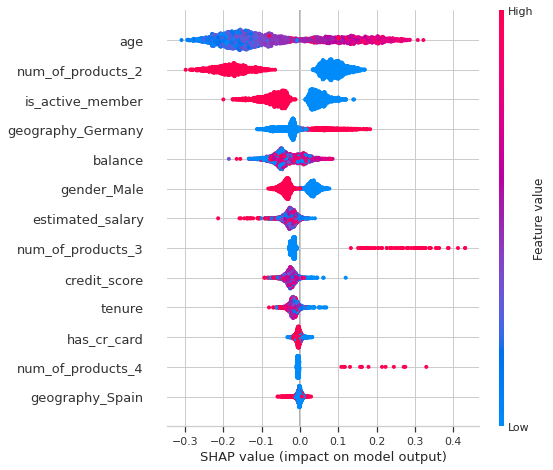

In [65]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

# Вывод:

**Слева** - у нас те признаки, что не ведут в отток, **справа**: те, что тянут в отток:
как видим в отток тянут такие признаки как: (по порядку значимости)

- 'num of products'
- 'age'
- 'geography'
- 'is active member'
- 'balance'
- 'gender'
- 'credit score'
- 'tenure'
- 'estimated salary'
- 'has cr card'

**То что обозначено красным цветом это бОльшие значения, синим - меньшие.**

**Где график имеет свойство утолщаться, говорит и скоплении значений -  то есть показывает распределение.**

Как видим моя модель предсказывает те же значения, что я интерпретировала при исследовании в проекте =)

- 'tenure'
- 'estimated salary'
- 'has cr card' 

имеют незначительное воздействие на отток.

**Представим портрет клиента, который скорее всего в скором времени примет решение об уходе**

- Примерный возраст от 40 до 60 лет
- В основном женщины
- У которых 3-4 продукта банка
- Чаще всего в Германии (нужно исследовать конкурентную сферу)
- В основном это не активные клиенты (что говорит о том, что нужно улучшить привлечение к активному пользованию)
- Кредитный рейтинг со средним значением
- Баланс от 100 до 150 тыс.руб (скорее всего депозитарные продукты)
- В основном уходят клиенты с малым количеством продуктов (0-2) и те кто имеет уже большое количество (8-9) 
- Уходят так же в основном, те, кто имеет кредитные карты

**Вывод** (рекомендации бизнесу)

Стоит внимательно присмотреться к бонусной системе и системе привлечения клиентов к своим продуктам. Так же внимательно рассмотреть продуктовую линейку в Германии, возможно отток клиентов происходит по причине появления конкурента, который предлагает более выгодные условия. Стоит заняться так же вопросом возобновления активности среди клиентов, которые неактивны продолжительное время, выгодные предложения, рассылка и пр. Так же рекомендую присмотреться к депозитарным продуктам, так как судя по всему, отток происходит начиная от среднего возраста и заканчивая пенсионным. Плюс суммы накоплений от 100 000, необходимо попробовать увеличить свои обороты путем мотивации клиентов вкладывать средства в ваш банк.

**Так же хотелось бы особенно отметить, если воспринимать за целевую переменную именно индикатор ухода клиента, то во временном пространстве это может оказаться поздним решением (то есть клиент уже принял решение, и почти ушел), лучше так же присматривать как целевую-активность клиента.**